In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('ventas.csv', decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [19]:
## a simple vista puedo indetificar que la columna ID Cliente teiene menos filas, seguramente se trate de valores nulos

In [21]:
## Tambien pude indentificar que los tipos de datos podrian mejorar, como fecha de factura esta en formato datetime

In [17]:
print(df.shape)   #Analiso la Base de Datos
df.head()

(25953, 6)


,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,-1.45
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83


In [25]:
#Se idenftifican algunos erorres como que existen cantidades y monto negeativos

In [27]:
df.isnull().sum()  #indotifico valores nulos

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

### Limpieza 

1. Datos faltantes de algunas celdas
2. Columnas irrelevantes para el problema a resolver
3. Regitros repetidos
4. Outliers
5. Errores tipgraficos en variables categoricas

### 1. Datos Faltantes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [33]:
df.isnull().sum()  #La columna id cliente tiene valores nulos

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [35]:
df['ID Cliente']=df['ID Cliente'].fillna(0) #modifico los ID cliente nulo con cero 0

In [37]:
df['ID Cliente']=df['ID Cliente'].astype(int) #los conveirto a entero

In [39]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348,United Kingdom,163,209.73
2,C570727,10/12/2021 11:32:00,12471,Germany,-1,-1.45
3,549106,4/6/2021 12:08:00,17045,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416,United Kingdom,357,344.83


### Columna irrelevantes

1. Columna categorica si hay mas de un nivel
2. Columna numericas con un solo valor
3. Columna con infromacion irrelevante para el problema a resolver
4. Columna con incormaicon redundante

Conteo de niveles en las diferente columnas categoricas

In [42]:
cols_cat=['N° de factura', 'Fecha de factura', 'País']

for col in cols_cat:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna N° de factura: 25900 subniveles
Columna Fecha de factura: 23260 subniveles
Columna País: 38 subniveles


In [44]:
## idenficar subnirifles de columnas categoricas, tiene que haber mas de un subnivel

In [50]:
df.describe()  #si el devio stdander es unico significa que no hay diversidad de valores, ahora si hay

,ID Cliente,Cantidad,Monto
count,25953.000000,25953.000000,25953.000000
mean,13051.745309,199.474049,375.657552
std,5577.777180,1107.075809,2009.042459
min,0.000000,-80995.000000,-168469.600000
25%,13004.000000,6.000000,11.550000
50%,14681.000000,100.000000,207.050000
75%,16496.000000,240.000000,408.660000
max,18287.000000,80995.000000,168469.600000


### Duplicados

In [52]:
print(f'Tamaño antes de eliminar filas duplicadas {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño despues de eliminar filas duplicadas {df.shape}')

Tamaño antes de eliminar filas duplicadas (25953, 6)
Tamaño despues de eliminar filas duplicadas (25943, 6)


In [78]:
# Elimina el o los duplicados  y deja el original

In [54]:
df.head(50)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348,United Kingdom,163,209.73
2,C570727,10/12/2021 11:32:00,12471,Germany,-1,-1.45
3,549106,4/6/2021 12:08:00,17045,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816,Germany,91,199.98
6,538125,12/9/2020 15:46:00,18225,United Kingdom,16,30.00
7,544354,2/18/2021 10:42:00,13489,United Kingdom,64,77.28
8,546369,3/11/2021 11:41:00,15513,United Kingdom,10,67.50
9,570651,10/11/2021 13:34:00,14911,EIRE,86,321.35


### Outliers

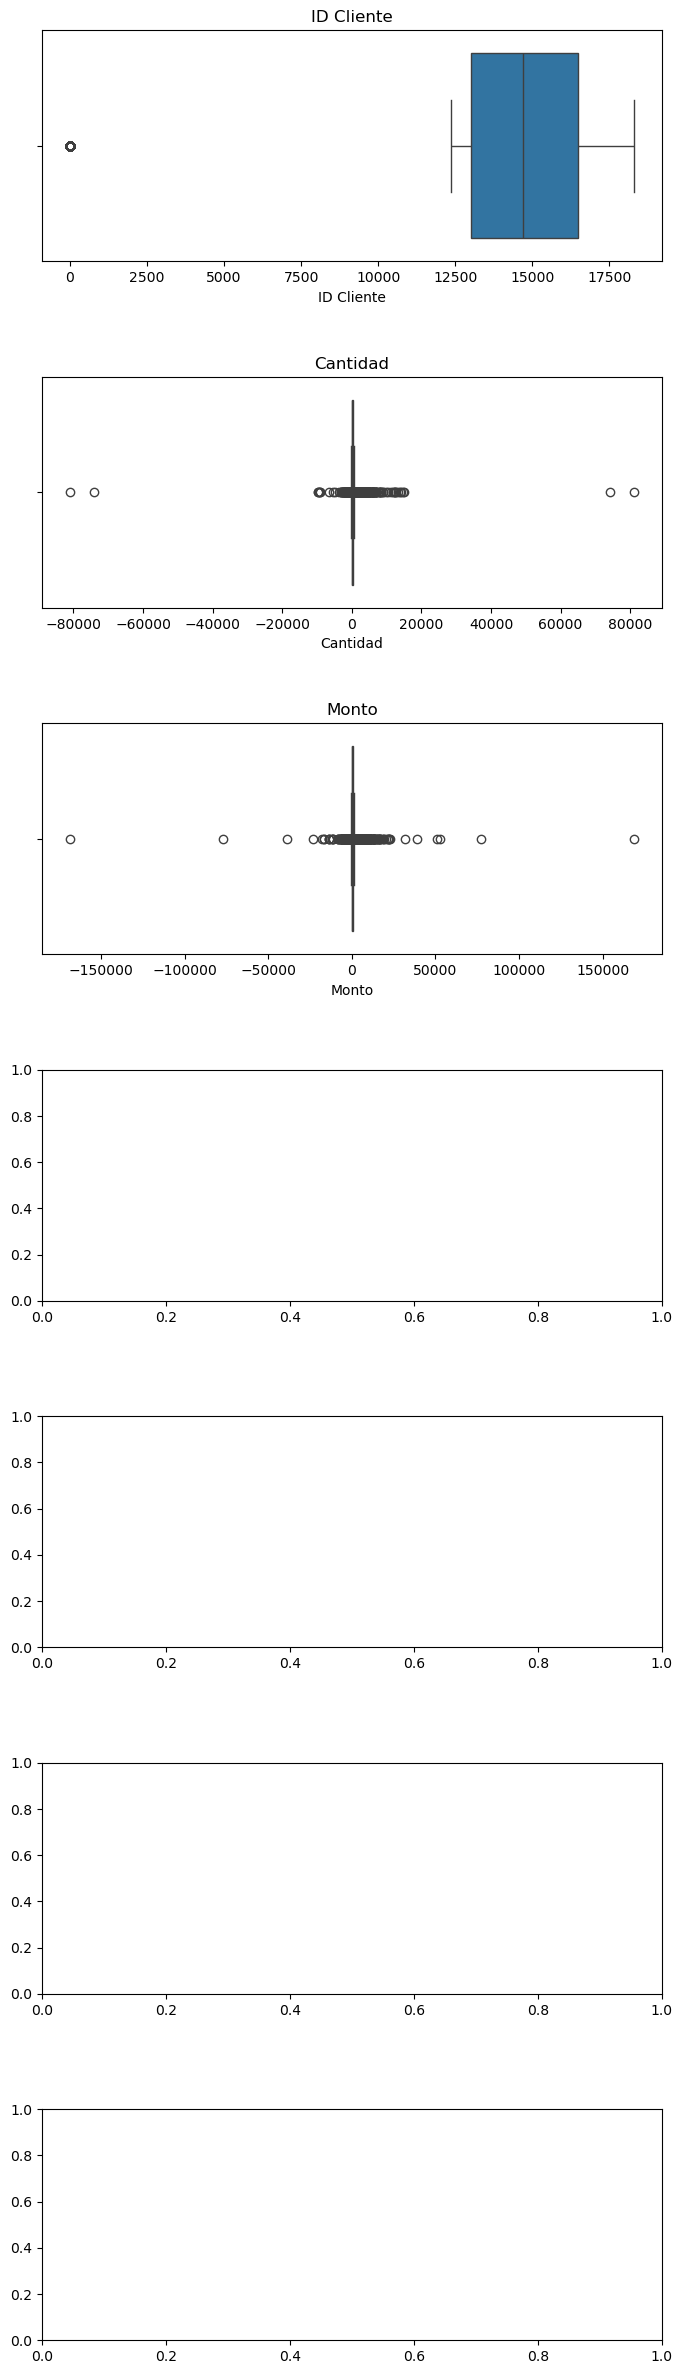

In [56]:
cols_num = ['ID Cliente','Cantidad','Monto']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
plt.show(1)

### Observaciones

1. EL id cliente se muestra correcto, el valor de 0 como outlier es por que ll hicmos manualemnte para id desconocidos
2. Existen cantidades negativas que hay que corregir
3. Existen montos negativso que hay que corregir, se trata de ventas y no pueden ser negativas

# Deberia hacer consultas en este etapa
1. Porque los importes negatviso de cantidad coincide con el prefijo "C" al comienzo de numero de factura.
2. Puesto a simular, supongo que se trata de errores en la regitracion.
3. Elimnio los valores negativos.

# Errores Tipograficos

1. Hay paises mal escritos
2. Hay que acomodar la fechas

In [59]:
paises_unicos= df['País'].unique()
paises_unicos

array(['United Kingdom', 'Germany', 'EIRE', 'France', 'Sweden', 'Belgium',
       'Italy', 'Japan', 'Israel', 'Portugal', 'Netherlands',
       'Channel Islands', 'Switzerland', 'Finland', 'Spain', 'Malta',
       'Singapore', 'United Arab Emirates', 'Norway', 'Hong Kong',
       'Denmark', 'Australia', 'USA', 'Poland', 'Lithuania',
       'European Community', 'Austria', 'Cyprus', 'Iceland',
       'Unspecified', 'Canada', 'Greece', 'Czech Republic', 'Lebanon',
       'Brazil', 'RSA', 'Bahrain', 'Saudi Arabia'], dtype=object)

In [151]:
frecuencias=df['País'].value_counts()
frecuencias

País
United Kingdom          23534
Germany                   603
France                    462
EIRE                      361
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      29
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Singapore                  10
Malta                      10
Israel                      9
Iceland                     7
USA                         7
Canada                      6
Greece                      6
European Community          5
Czech Republic              5
Bahrain                     4
Lithuania                   4
Unite

In [108]:
df['Fecha_de_factura']=pd.to_datetime(df['Fecha_de_factura']) 

In [ ]:
## Cambio el tipo de dato de la columna Fecha_de_factura a datetime

In [65]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,2021-03-30,15528,United Kingdom,123,229.33
1,575767,2021-11-11,17348,United Kingdom,163,209.73
2,C570727,2021-10-12,12471,Germany,-1,-1.45
3,549106,2021-04-06,17045,United Kingdom,1,39.95
4,573112,2021-10-27,16416,United Kingdom,357,344.83


In [67]:
frecuencia_idcliente=df['ID Cliente'].value_counts()
frecuencia_idcliente

ID Cliente
0        3722
14911     249
12748     225
17841     169
14606     130
         ... 
17839       1
12401       1
17222       1
15185       1
13600       1
Name: count, Length: 4373, dtype: int64

In [175]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Devolucion
0,548370,2021-03-30,15528,United Kingdom,123,229.33,False
1,575767,2021-11-11,17348,United Kingdom,163,209.73,False
2,C570727,2021-10-12,12471,Germany,-1,-1.45,True
3,549106,2021-04-06,17045,United Kingdom,1,39.95,False
4,573112,2021-10-27,16416,United Kingdom,357,344.83,False


In [75]:
df.columns = df.columns.str.replace(' ','_') #acomodo la columnas para MySQL

In [77]:
df

,N°_de_factura,Fecha_de_factura,ID_Cliente,País,Cantidad,Monto
0,548370,2021-03-30,15528,United Kingdom,123,229.33
1,575767,2021-11-11,17348,United Kingdom,163,209.73
2,C570727,2021-10-12,12471,Germany,-1,-1.45
3,549106,2021-04-06,17045,United Kingdom,1,39.95
4,573112,2021-10-27,16416,United Kingdom,357,344.83
...,...,...,...,...,...,...
25948,C556518,2021-06-13,16794,United Kingdom,-2,-12.70
25949,553060,2021-05-13,15826,United Kingdom,488,720.00
25950,577049,2021-11-17,17397,United Kingdom,104,298.78
25951,550122,2021-04-14,12931,United Kingdom,1176,1488.00


In [81]:
df=df.rename(columns={'País': 'Pais'})

In [225]:
ventas.to_csv('ventas_limpias1.csv', index=False)

### Archivo De Ventas Limpio para ser analizado 

1. ventas_limpias1
   

# El arhivo estaba como el orto asique tengo que limpiarlo aun, negatvios en cantidaddes y montos

In [86]:
df.drop(df[(df['Monto']<=0)].index, inplace=True)

In [89]:
df.drop(df[(df['Cantidad'] <0)].index, inplace=True)

In [94]:
df.drop(df[(df['ID_Cliente'] ==0)].index, inplace=True)

In [96]:
df.describe()

,ID_Cliente,Cantidad,Monto
count,18562.000000,18562.000000,18562.000000
mean,15266.266782,278.448605,480.088778
std,1733.952850,971.837519,1676.772723
min,12346.000000,1.000000,0.380000
25%,13777.000000,74.000000,157.700000
50%,15176.500000,155.000000,302.875000
75%,16779.000000,290.000000,471.257500
max,18287.000000,80995.000000,168469.600000


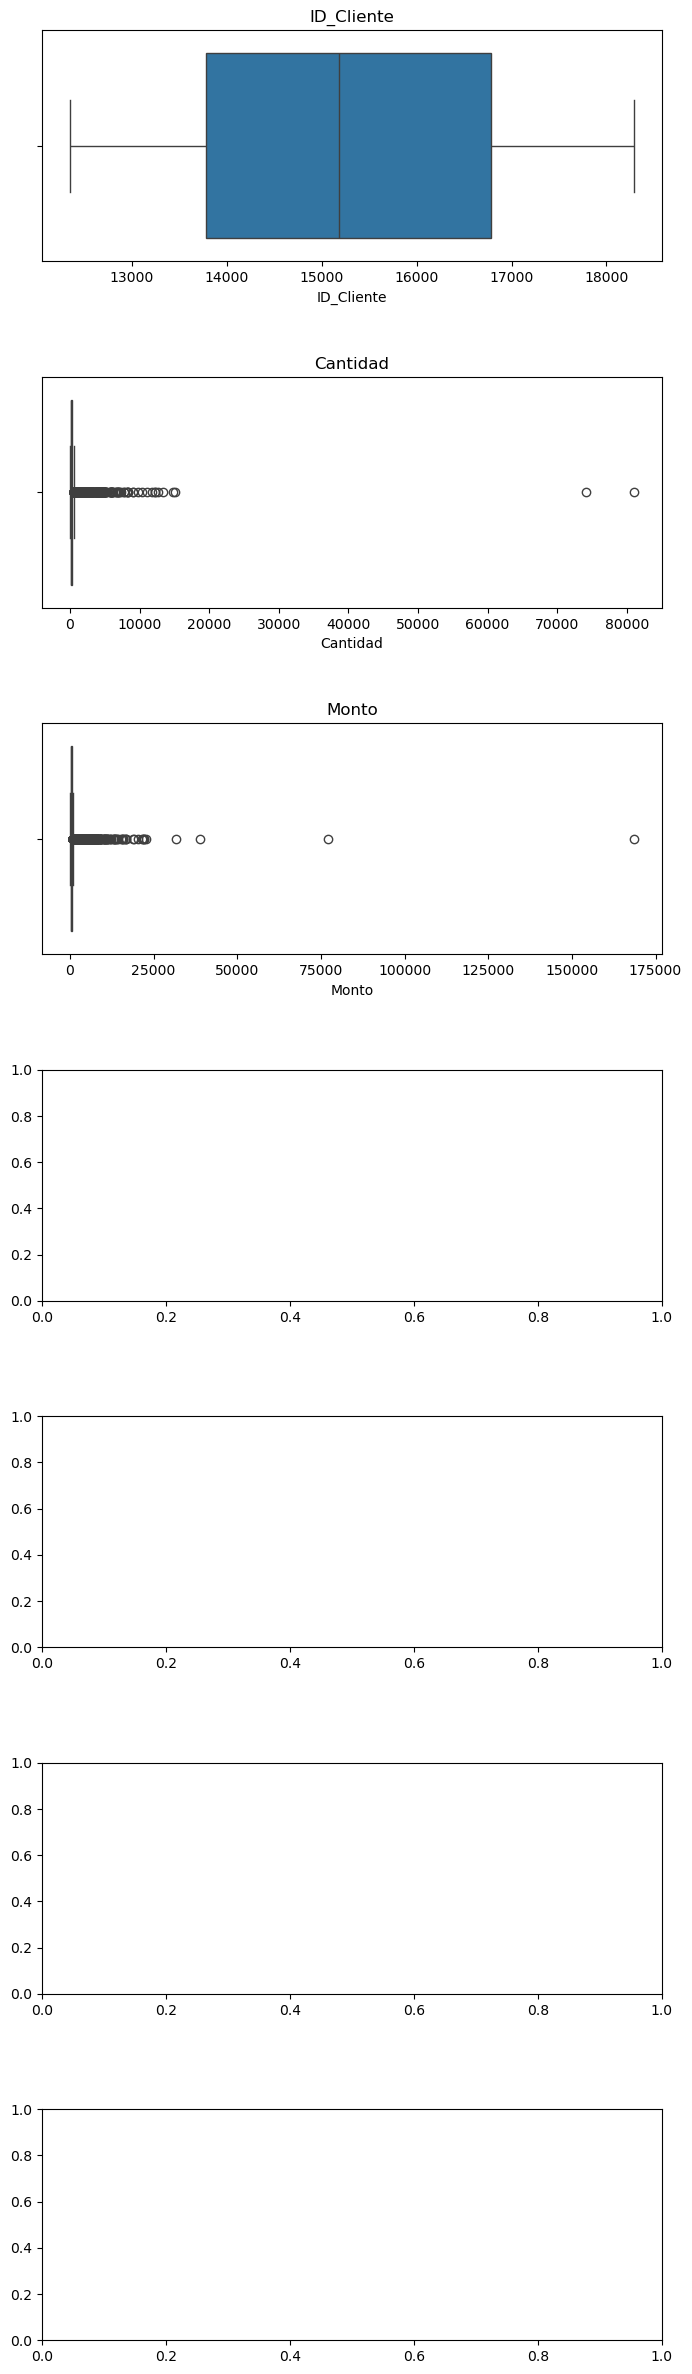

In [99]:
cols_num = ['ID_Cliente','Cantidad','Monto']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
plt.show(1)

In [101]:
# Ya no hay cantidades ni montos negativos como tampoco idcliente 0

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18562 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N°_de_factura     18562 non-null  object        
 1   Fecha_de_factura  18562 non-null  datetime64[ns]
 2   ID_Cliente        18562 non-null  int32         
 3   Pais              18562 non-null  object        
 4   Cantidad          18562 non-null  int64         
 5   Monto             18562 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 942.6+ KB


In [113]:
df.to_csv('ventasss.csv', index=False)